<a href="https://colab.research.google.com/github/ctalamilla/uba-ceia-PEIA_tf/blob/main/TPFinal_18Co2024_PEIA_Grupo5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Integrantes:
```
Ezequiel Eduardo,Maudet
```

```
Cristian Patricio,Salinas Talamilla
```

```
Natalia, Diaz
```

Consigna WEB

1. El TP debe subirse el próximo domingo 13 de octubre a más tardar a media noche

2. Cada grupo debe realizar los ejercicios y los datos que se encuentran en los archivos que contienen su número de grupo o código SIU. No se admiten respuestas con datos y ejercicios que no correspondan.

3. Se debe entregar un informe en pdf y también un archivo de código ejecutable. No se admite código en pdf.

4. Algunos puntos para resolver el TP se abordarán en la próxima clase.

## Consigna Final

Siguiendo con la historia de Don Francisco, con el tiempo y gracias a los analisis de Matıas, el pequeno comerciante de
barrio cuenta hoy con 5 supermercados: ’Santa Ana’, ’La Floresta’, ’Los Cedros’, ’Palermo’ y ’Cordoba’.
Tambien Matıas ha avanzado en la Especializacion en Inteligencia Artificial. Un dıa Don Francisco le plantea algunas
inquietudes adicionales:
1. Don Francisco quiere entender mejor las ventas por mes del supermercado ’Santa Ana’.
2. Mas aun, Don Francisco no sabe si puede estar seguro de que las ventas son las mismas en todos los supermercados o
si hay alguno que se comporte mejor que los demas, y si alguna de las tiendas necesita mas atencion porque sus ventas
sean peores que las de las otras.
3. Don Francisco tiene 5 clientes a los que les ha vendido mercancıas a credito y, de ellos, 1 estan en mora con el pago
prometido. Matıas, teniendo en cuenta la informacion disponible, considera que puede modelar el porcentaje p de
morosidad segun una distribucion B(2, 3). Para determinar los parametros α y β, decide usar inferencia bayesiana. Con
esto, pretende explicarle a Don Francisco, como sera el comportamiento de pago de sus clientes a credito.


Con base en lo anterior,
1. (2.5 puntos) Determinen intervalos de confianza empıricos para el supermercado ’Santa Ana’ en cada mes, para significancias del 95 % y el 99 %.
2. (2.5 puntos) Realicen pruebas ANOVA para determinar si las ventas esperadas de todas las tiendas son iguales o no,
con significancia del 95
3. (2.5 puntos) Identifiquen la tienda con mayor promedio de ventas y la tienda con menor promedio de ventas y realicen
una prueba de hipotesis para determinar si la diferencia entre ellas es distinta de cero o no.
4. (2.5 puntos) Determinen la distribucion a posteriori del parametro p de porcentaje de morosidad. Determinar su media
y su varianza.

Deben realizar un informe en un documento pdf, en donde queden claros los siguientes aspectos:

1. Planteamiento de los problemas de investigacion
2. Procesamiento realizado a los datos
3. Resultados encontrados
4. Analisis y conclusiones

## Ingesta de Datos

In [ ]:
import pandas as pd

In [ ]:
# Load the Excel file
file_path = '/content/Datos_examen_final_18Co2024_Grupo5.xlsx'


xls = pd.ExcelFile(file_path)

dfs = []

for sheet_name in xls.sheet_names:
    df = pd.read_excel(xls, sheet_name=sheet_name)
    df['super'] = sheet_name  # Add a column for the sheet name
    dfs.append(df)

# Combine all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)


In [ ]:
combined_df

,Fecha,Ventas,super
0,2023-01-01,10066.432359,Santa Ana
1,2023-01-02,13093.298449,Santa Ana
2,2023-01-03,13086.182223,Santa Ana
3,2023-01-04,12578.254695,Santa Ana
4,2023-01-05,15418.787182,Santa Ana
...,...,...,...
1820,2023-12-27,19108.526519,Córdoba
1821,2023-12-28,19895.162025,Córdoba
1822,2023-12-29,19212.783810,Córdoba
1823,2023-12-30,15647.138069,Córdoba


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   1825 non-null   datetime64[ns]
 1   Ventas  1825 non-null   float64       
 2   super   1825 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.9+ KB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

A continuación se realizan histogramas de cada una de las tiendas o supermercados de Don Julio.

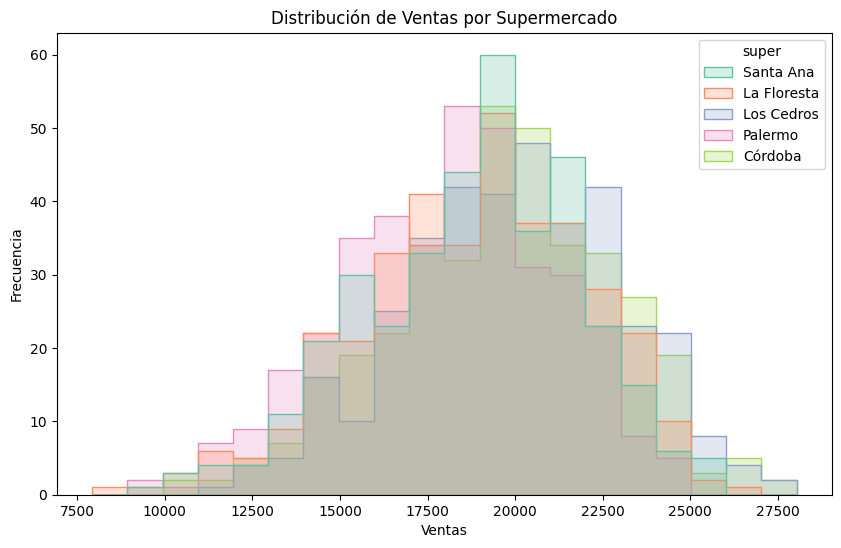

In [ ]:
# Set the figure size
plt.figure(figsize=(10,6))

# Plot the distribution of sales for each supermarket
sns.histplot(data=combined_df, x='Ventas', hue='super', element="step", palette="Set2", bins=20)

# Set titles and labels
plt.title('Distribución de Ventas por Supermercado')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')

# Show the plot
plt.show()

Para una mejor exploración de las ventas por supermercado se realiza un boxplot por cada tienda.

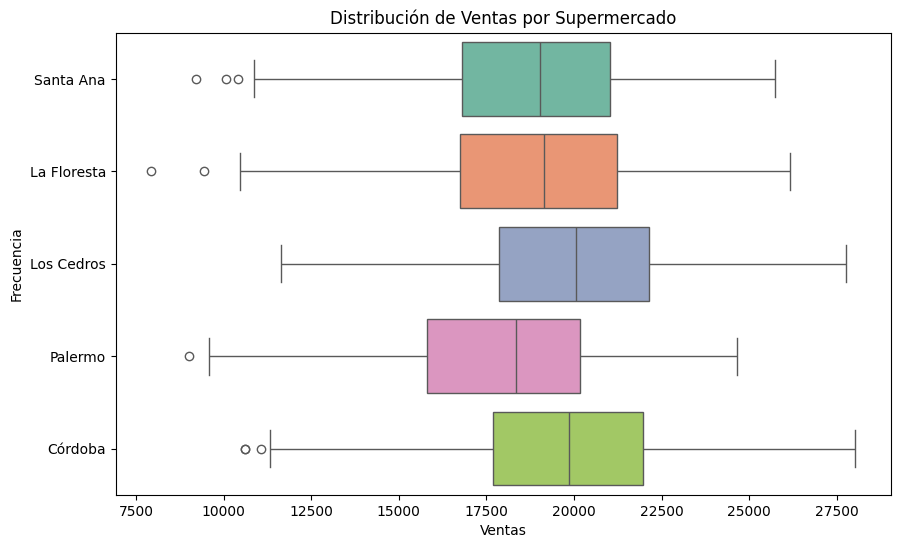

In [ ]:
# Set the figure size
plt.figure(figsize=(10,6))

# Plot the distribution of sales for each supermarket
sns.boxplot(data=combined_df, x='Ventas', y='super', hue='super', palette="Set2")

# Set titles and labels
plt.title('Distribución de Ventas por Supermercado')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')

# Show the plot
plt.show()

Finalmente, a continuacion se realiza un grafico de la distribucion de las ventas por cada supermercado.

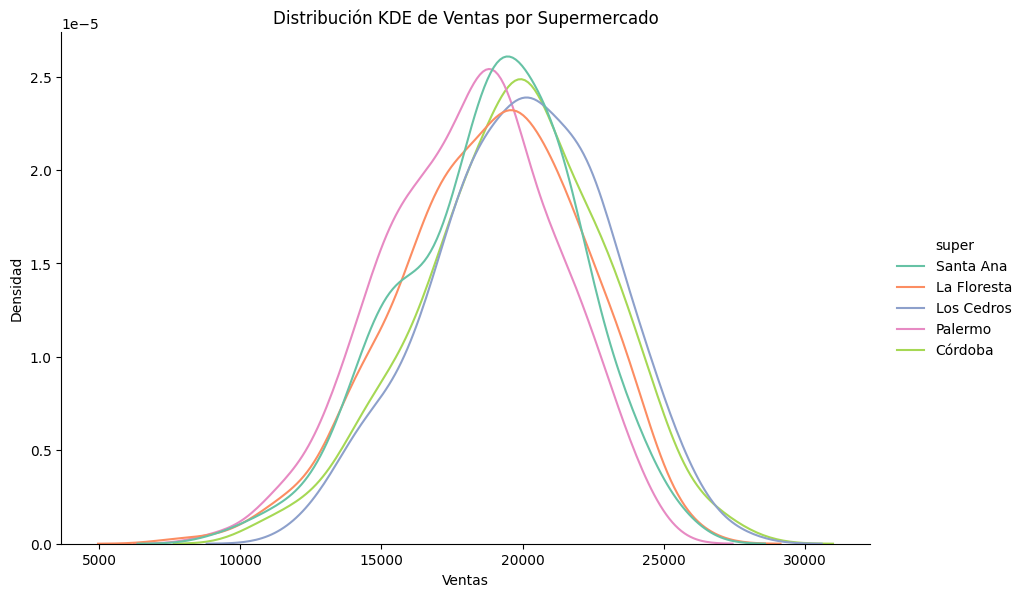

In [ ]:
# It seems there was an issue with non-numeric data, so let's ensure only numeric values are used for the 'Ventas' column

sns.displot(data=combined_df, x='Ventas', hue='super', kind='kde', height=6, aspect=1.5, palette="Set2")

# Set titles and labels
plt.title('Distribución KDE de Ventas por Supermercado')
plt.xlabel('Ventas')
plt.ylabel('Densidad')

# Show the plot
plt.show()

## Respuestas

### 1. Int. Confianza
(2.5 puntos) Determinen intervalos de confianza empıricos para el supermercado ’Santa Ana’ en cada mes, para significancias del 95 % y el 99 %.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
santa_ana_df = combined_df.loc[combined_df['super'] == 'Santa Ana',:]

santa_ana_df['Fecha'] = pd.to_datetime(santa_ana_df['Fecha'])
santa_ana_df['YearMonth'] = santa_ana_df['Fecha'].dt.month

In [ ]:
santa_ana_df

,Fecha,Ventas,super,YearMonth
0,2023-01-01,10066.432359,Santa Ana,1
1,2023-01-02,13093.298449,Santa Ana,1
2,2023-01-03,13086.182223,Santa Ana,1
3,2023-01-04,12578.254695,Santa Ana,1
4,2023-01-05,15418.787182,Santa Ana,1
...,...,...,...,...
360,2023-12-27,17884.103469,Santa Ana,12
361,2023-12-28,22219.212706,Santa Ana,12
362,2023-12-29,19634.214762,Santa Ana,12
363,2023-12-30,14181.605924,Santa Ana,12


A continuacion se realiza el conteo de registros por cada mes, el proposito es determinar si se una un estadistico t o z. Si el valor de registros es mayor o igual a 30 se realizara con un estadistico z. Caso contratrario un estadistico t.

In [ ]:
santa_ana_df.groupby(['YearMonth']).count()

,Fecha,Ventas,super
YearMonth,,,
1,31,31,31
2,28,28,28
3,31,31,31
4,30,30,30
5,31,31,31
6,30,30,30
7,31,31,31
8,31,31,31
9,30,30,30


In [ ]:
import scipy.stats as stats
import numpy as np

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html

A continuacion se agregan los datos por mes capturando los datos necesarios para los IC.

In [ ]:
monthly_data = santa_ana_df.groupby('YearMonth')['Ventas'].agg([np.mean, np.std, 'count']).reset_index()
monthly_data

,YearMonth,mean,std,count
0,1,14713.497406,2557.696875,31
1,2,17509.343113,2551.730823,28
2,3,19354.774944,2650.433336,31
3,4,17464.477484,2529.556619,30
4,5,19891.573881,2431.271780,31
5,6,20399.462207,2443.695453,30
6,7,19731.858600,2970.524331,31
7,8,19908.138961,2804.631369,31
8,9,20100.140126,2359.157118,30
9,10,19059.013600,3127.573117,31


A continuacion se define una funcion para realizar los IC. De esta manera usando la media, el sd, n y el intervalo deseado se podra conocer los limite inferior y limite superior del IC.

In [ ]:
# Function to calculate the confidence interval using t-distribution
def confidence_interval_t(mean, std_dev, n, confidence_level):
    # Calculate the t-value for the given confidence level and degrees of freedom (n-1)
    t_value = stats.t.ppf((1 + confidence_level) / 2, df=n-1)

    # Standard error of the mean
    sem = std_dev / np.sqrt(n)

    # Calculate the margin of error
    margin_of_error = t_value * sem

    li = round((mean - margin_of_error),4)
    ls = round((mean + margin_of_error),4)

    # Return the lower and upper bounds of the confidence interval
    return li , ls

A continuacion se iterará usando una funcion lambda por cada fila (mes).

In [ ]:
# Re-run the previous calculation using t-distribution
monthly_data['CI_95_t'] = monthly_data.apply(lambda row: confidence_interval_t(row['mean'], row['std'], row['count'], 0.95), axis=1)
monthly_data['CI_99_t'] = monthly_data.apply(lambda row: confidence_interval_t(row['mean'], row['std'], row['count'], 0.99), axis=1)

In [ ]:
monthly_data

,YearMonth,mean,std,count,CI_95_t,CI_99_t
0,1,14713.497406,2557.696875,31,"(13775.3266, 15651.6682)","(13450.2156, 15976.7792)"
1,2,17509.343113,2551.730823,28,"(16519.8852, 18498.801)","(16173.2317, 18845.4545)"
2,3,19354.774944,2650.433336,31,"(18382.5881, 20326.9617)","(18045.6893, 20663.8605)"
3,4,17464.477484,2529.556619,30,"(16519.9255, 18409.0294)","(16191.491, 18737.464)"
4,5,19891.573881,2431.271780,31,"(18999.7762, 20783.3716)","(18690.7352, 21092.4126)"
5,6,20399.462207,2443.695453,30,"(19486.9713, 21311.9531)","(19169.6849, 21629.2395)"
6,7,19731.858600,2970.524331,31,"(18642.2615, 20821.4557)","(18264.6756, 21199.0416)"
7,8,19908.138961,2804.631369,31,"(18879.3919, 20936.8861)","(18522.8928, 21293.3851)"
8,9,20100.140126,2359.157118,30,"(19219.2164, 20981.0639)","(18912.9063, 21287.3739)"
9,10,19059.013600,3127.573117,31,"(17911.8105, 20206.2167)","(17514.2621, 20603.7651)"


A continuacion se grafican los IC para conocer el comportamiento entre los meses.

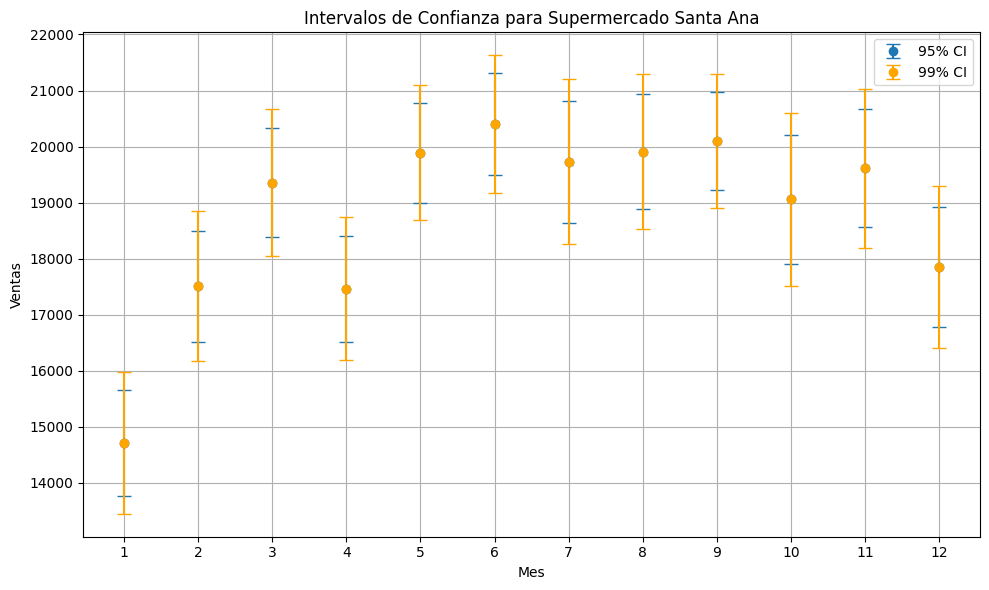

In [ ]:
# Re-run the plotting code to display confidence intervals
plt.figure(figsize=(10, 6))

# Plot 95% confidence intervals
plt.errorbar(monthly_data['YearMonth'], monthly_data['mean'],
             yerr=[(monthly_data['mean'] - monthly_data['CI_95_t'].apply(lambda x: x[0])),
                   (monthly_data['CI_95_t'].apply(lambda x: x[1]) - monthly_data['mean'])],
             fmt='o', capsize=5, label='95% CI')

# Plot 99% confidence intervals
plt.errorbar(monthly_data['YearMonth'], monthly_data['mean'],
             yerr=[(monthly_data['mean'] - monthly_data['CI_99_t'].apply(lambda x: x[0])),
                   (monthly_data['CI_99_t'].apply(lambda x: x[1]) - monthly_data['mean'])],
             fmt='o', capsize=5, label='99% CI', color='orange')

plt.title('Intervalos de Confianza para Supermercado Santa Ana')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.xticks(monthly_data['YearMonth'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Grafcando los intervalos de confianza de cada sucursal,se observa que no se encontraron diferencias significativas entre Santa Ana y La Floresta ni entre Los Cedros y Córdoba. Esto significa que, según estos resultados, las ventas en esas dos parejas de sucursales no son significativamente diferentes. En todas las demás comparaciones, hay diferencias significativas en las ventas.

### ANOVA


(2.5 puntos) Realicen pruebas ANOVA para determinar si las ventas esperadas de todas las tiendas son iguales o no, con significancia del 95

In [ ]:
from scipy.stats import f

A continuacion se implementa una funcion para realizar la prueba ANOVA.

In [ ]:
# Complete function to perform ANOVA and compare with F critical value
def perform_anova_and_compare(df, alpha=0.05):
    # Media por grupos y media general
    group_means = df.groupby('super')['Ventas'].mean()
    overall_mean = df['Ventas'].mean()

    # numero de grupos y total de obs
    num_groups = df['super'].nunique()
    num_total = len(df)

    # Between-group sum of squares (SSB)
    ss_between = sum(df[df['super'] == group]['Ventas'].count() * (mean - overall_mean) ** 2
                     for group, mean in group_means.items())

    # Within-group sum of squares (SSW)
    ss_within = sum(sum((df[df['super'] == group]['Ventas'] - mean) ** 2)
                    for group, mean in group_means.items())

    # grados de libertad
    df_between = num_groups - 1
    df_within = num_total - num_groups

    # Mean squares
    ms_between = ss_between / df_between
    ms_within = ss_within / df_within

    # F-statistic
    F_statistic = ms_between / ms_within

    # F critico
    F_critical = f.ppf(1 - alpha, df_between, df_within)

    # Compare the calculated F-statistic with the critical value
    if F_statistic > F_critical:
        result = "Rechazo Ho: Existen diferencias significativas en las medias."
    else:
        result = "No Rechazo Ho: No existen diferencias significativas entre las medias."

    return F_statistic, F_critical, result

In [ ]:
# Now you can simply call this function with the dataframe
F_statistic, F_critical, result = perform_anova_and_compare(combined_df)

# Display the result
print(f"Estadistico de prueba {F_statistic}, Estadistico critico {F_critical}, resultado{result}")

Estadistico de prueba 20.67879105152835, Estadistico critico 2.3768170804427053, resultadoRechazo Ho: Existen diferencias significativas en las medias.


A continuacion una prueba ANOVA usando el modulo stats de scipy

In [ ]:
from scipy import stats

In [ ]:
# Agrupa los datos por tienda (Sheet) para realizar la prueba ANOVA
sales_by_store = [group['Ventas'].values for _, group in combined_df.groupby('super')]

# Realiza la prueba ANOVA
f_stat, p_value = stats.f_oneway(*sales_by_store)

# Define el nivel de significancia
alpha = 0.05

# Determina si rechazamos la hipótesis nula
reject_null = p_value < alpha

# Muestra los resultados
anova_test_result = {
    'F-Statistic': f_stat,
    'P-Value': p_value,
    'Alpha': alpha,
    'Rechazar Ho': reject_null
}

anova_test_result


{'F-Statistic': 20.678791051528332,
 'P-Value': 1.1038709211748026e-16,
 'Alpha': 0.05,
 'Rechazar Ho': True}

**CONCLUCION:**
Como el valor p es mucho menor que 0.05, rechazamos la hipótesis nula. Esto significa que, con un nivel de confianza del 95%, las ventas esperadas entre las tiendas no son iguales, es decir, existen diferencias significativas en las ventas entre las sucursales.

### 3. Prueba Hipotesis
(2.5 puntos) Identifiquen la tienda con mayor promedio de ventas y la tienda con menor promedio de ventas y realicen una prueba de hipotesis para determinar si la diferencia entre ellas es distinta de cero o no.

In [ ]:
store_means = combined_df.groupby('super')['Ventas'].mean()

In [ ]:
store_means

,Ventas
super,
Córdoba,19654.190976
La Floresta,18834.636284
Los Cedros,19943.839870
Palermo,18076.517131
Santa Ana,18804.139215


A continuacion se identifican las tiendas con mayor y menor ventas.

In [ ]:
# Identify the store with the highest and lowest mean sales
max_sales_store = store_means.idxmax()
min_sales_store = store_means.idxmin()

In [ ]:
print(f'La tienda con mayor ventas promedio es: {max_sales_store}')
print(f'La tienda con menor ventas promedio es: {min_sales_store}')

La tienda con mayor ventas promedio es: Los Cedros
La tienda con menor ventas promedio es: Palermo


In [ ]:
max_sales_mean = store_means.max()
min_sales_mean = store_means.min()

In [ ]:
print(f'La tienda con mayor ventas promedio es: {max_sales_store}, con un total de {max_sales_mean}')
print(f'La tienda con menor ventas promedio es: {min_sales_store}, con un total de {min_sales_mean}')

La tienda con mayor ventas promedio es: Los Cedros, con un total de 19943.83986956417
La tienda con menor ventas promedio es: Palermo, con un total de 18076.51713144438


A continuacion se separan en dos dataset uno para el de ventas promedio maxima y otro para el de promedio de ventas minimo.

In [ ]:
max_sales_data = combined_df[combined_df['super'] == max_sales_store]['Ventas']
min_sales_data = combined_df[combined_df['super'] == min_sales_store]['Ventas']

In [ ]:
max_sales_data.head(3)

,Ventas
730,14041.055154
731,11639.859898
732,18712.739397


In [ ]:
min_sales_data.head(3)

,Ventas
1095,11947.875138
1096,14765.576191
1097,16236.354912


A continuacion se confecciona una funcion para la prueba de hipotesis.

In [ ]:
def prueba_hipotesis_dos_muestras(sample1, sample2, nivel_confianza):
    # Calcular las medias y desviaciones estándar de ambas muestras
    media1 = np.mean(sample1)
    media2 = np.mean(sample2)

    # Desviación estándar con corrección de Bessel (ddof=1)
    std1 = np.std(sample1, ddof=1)
    std2 = np.std(sample2, ddof=1)

    # Calcular la desviación estándar combinada (pooled std)
    std_combinada = np.sqrt(((len(sample1) - 1) * std1**2 + (len(sample2) - 1) * std2**2) / (len(sample1) + len(sample2) - 2))

    # Calcular el valor t usando la desviación estándar combinada
    t_estadistico = (media1 - media2) / (std_combinada * np.sqrt((1 / len(sample1)) + (1 / len(sample2))))

    # Grados de libertad
    df = len(sample1) + len(sample2) - 2

    # Obtener el valor crítico t para el nivel de confianza especificado
    t_critico = stats.t.ppf((1 + nivel_confianza) / 2, df=df)

    # Calcular el p-valor (doble cola)
    p_valor = 2 * (1 - stats.t.cdf(abs(t_estadistico), df=df))

    # Regla de decisión: si el valor absoluto de t es mayor que el valor crítico, se rechaza la hipótesis nula
    if abs(t_estadistico) > t_critico:
        resultado = "Rechazar la hipótesis nula"
    else:
        resultado = "No se puede rechazar la hipótesis nula"

    return t_estadistico, t_critico, p_valor, resultado

In [ ]:
result = prueba_hipotesis_dos_muestras(max_sales_data, min_sales_data, 0.95)
print(f'Resultado de la Prueba \n Estadistico t= {result[0]}, \n t-critico= {result[1]}, \n p-valor= {result[2]},\n decision= {result[3]}')

Resultado de la Prueba 
 Estadistico t= 8.260504488222256, 
 t-critico= 1.963227931127224, 
 p-valor= 6.661338147750939e-16,
 decision= Rechazar la hipótesis nula


Se rechaza la Ho con un p-valor = 6.6613e-16. El t-critico su superado por el t-empirico, es decir el t-empirico esta en la zona de rechazo de Ho. Se utilizo una prueba de dos colas debido a la consigna suministrada.

A continuacion se prueba la implementacion de scipy para esta prueba t de dos poblaciones. Los vaores del estadistico t y pvalue son muy aproximados a los calculados de manera manual.

In [ ]:
# Perform a t-test for the difference in means
t_stat, p_value = stats.ttest_ind(max_sales_data, min_sales_data, equal_var=False)

# Create a summary of results
hypothesis_test_result = {
    'Store with Max Sales': max_sales_store,
    'Max Sales Mean': max_sales_mean,
    'Store with Min Sales': min_sales_store,
    'Min Sales Mean': min_sales_mean,
    'T-Statistic': t_stat,
    'P-Value': p_value
}

hypothesis_test_result


{'Store with Max Sales': 'Los Cedros',
 'Max Sales Mean': 19943.83986956417,
 'Store with Min Sales': 'Palermo',
 'Min Sales Mean': 18076.51713144438,
 'T-Statistic': 8.260504488222256,
 'P-Value': 6.836839919003848e-16}

### Inferencia Bayesiana

### Planteamiento:

1. **Distribución previa**:
   Matías modela el porcentaje de morosidad (\( p \)) según una distribución Beta con parámetros $alpha = 2$ y $beta = 3 $, es decir, $ p \sim \text{Beta}(2, 3) $.

   La distribución Beta es comúnmente usada como prior para la proporción de eventos, en este caso, morosidad.

2. **Función de verosimilitud**:
   Como se sabe que Don Francisco tiene 5 clientes, de los cuales 1 está en mora, podemos asumir que el número de clientes en mora sigue una distribución binomial $ \text{Bin}(n=5, p) $, donde $n $ es el número de clientes y $ p $ es la probabilidad de morosidad.

   La verosimilitud se puede expresar como:
   $$
   P(\text{datos} \mid p) = \binom{5}{1} p^1 (1-p)^{5-1}
   $$

3. **Distribución a posteriori**:
   La distribución a posteriori se obtiene multiplicando la distribución previa $ \text{Beta}(2, 3) $ y la verosimilitud binomial. Debido a que la Beta es conjugada con la Binomial, la distribución a posteriori también será una distribución Beta con parámetros actualizados.

   La fórmula general es:
   $$
   p \mid \text{datos} \sim \text{Beta}(\alpha' = \alpha + x, \beta' = \beta + n - x)
   $$
   
   Donde:
   - $ x = 1 $ es el número de clientes en mora.
   - $ n = 5 $ es el total de clientes.
   - $ \alpha = 2 $ y $ \beta = 3 $ son los parámetros de la distribución previa.

   Entonces, los nuevos parámetros de la distribución a posteriori son:
   $$
   \alpha' = 2 + 1 = 3
   $$
   $$
   \beta' = 3 + 5 - 1 = 7
   $$
   Por lo tanto, la distribución a posteriori es $ p \mid \text{datos} \sim \text{Beta}(3, 7) $.

### Media y varianza de la distribución a posteriori:

- **Media** de la distribución Beta($ \alpha, \beta $) es:

  $$
  \text{Media} = \frac{\alpha'}{\alpha' + \beta'} = \frac{3}{3 + 7} = \frac{3}{10} = 0.3
  $$


- **Varianza** de la distribución Beta($ \alpha, \beta $) es:
  $$
  \text{Varianza} = \frac{\alpha' \beta'}{(\alpha' + \beta')^2 (\alpha' + \beta' + 1)} = \frac{3 \times 7}{(3 + 7)^2 (3 + 7 + 1)} = \frac{21}{100 \times 11} = \frac{21}{1100} \approx 0.0191
  $$

### Resumen:

- La distribución a posteriori de $ p $ es $ \text{Beta}(3, 7) $.
- La **media** de la distribución a posteriori es 0.3, lo que significa que Matías esperaría que el 30% de los clientes de Don Francisco se atrasen en los pagos.
- La **varianza** de la distribución a posteriori es aproximadamente 0.0191.
